# Análise de Fourier (incompleto)

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará

## Séries de Fourier

Uma função periódica qualquer $f(t) = f(t+T)$ com período $T$ pode ser representada como:

$$ f(t) = \sum_{m=0}^\infty a_m \cos \left( \frac{2\pi m}{T} t\right) + \sum_{m=1}^\infty b_m \sin \left( \frac{2\pi m}{T} t\right)$$

$$ f(t) = a_0 \sum_{m=1}^\infty a_m \cos \left( \frac{2\pi m}{T} t\right) + \sum_{m=1}^\infty b_m \sin \left( \frac{2\pi m}{T} t\right)$$


Note que esta série envolve funções periódicas com frequências $\omega_m = m \omega_0$, onde $\omega_0 = 2\pi/T$. As funções $\cos \left( \frac{2\pi m}{T} t\right)$ e $\sin \left( \frac{2\pi m}{T} t\right)$ possuem propriedades de ortogonalidade especiais:


$$a_0=\frac{2}{T} \int_0^T f(t) dt$$
$$a_m=\frac{2}{T} \int_0^T f(t) \cos \left( \frac{2\pi m}{T} t\right) dt$$
$$b_m=\frac{2}{T} \int_0^T f(t) \sin \left( \frac{2\pi m}{T} t\right) dt$$

A série de Fouier também pode ser escrita na forma complexa:

$$ f(t) = \sum_{m=-\infty}^\infty c_m e^{i 2m\pi t/T}$$

onde 

$$c_m = \frac{1}{T} \int_0^T f(t) e^{-i 2m\pi t/T} dt $$

Nesta forma compacta, os coeficientes $c_n$ continuam nos dizer o quanto a frequência $\omega_n = n \omega_0$ contribui para $f(t)$. Note que $c_m^* = c_{-m}$ de forma que frequências negativas não possuem significado. As parte real e imaginária de $c_n$ estão relacionadas a paridade de $f(t)$. 

Podemos pensar nos coeficientes $c_m$ como uma função da frequência $c_m = c(m\omega_0)$. Note também a natureza discreta das frequências $\omega_m$. No limite em que T é muito grande, as frequências $\omega_m$ tornam-se quasi-contínuas, de forma que podemos representar a série complexa de $f(t)$ como:

$$f(t) = \int_0^\infty F(\omega) e^{i \omega t} $$


## Séries de Fourier de funções discretas

Sabemos que, computacionalmente, uma função $f(t)$ é representada em um conjunto finito de $N$ pontos $t_i+1 = t_i + \Delta t$ representados em um intervalo finito $[a,b]$. Sendo assim, a integral:

$$c_m = \frac{1}{T} \int_0^T f(t) e^{-i 2m\pi t/T} dt $$

torna-se

$$c(m) \approx \frac{1}{N} \sum_{j=0}^{N-1} f(t_j) e^{-i 2\pi m j/N} $$


## Código para transformada de Fourier

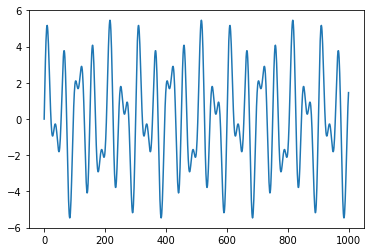

In [1]:
# ---------------------------------------------------
# This routine is an example of how to use 
# the Fast Fourier Transform (FFT) in Python
# ---------------------------------------------------

# importing libraries

from numpy import fft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# constructing a function f(t) 

n = 1000 # Number of data points
dt = 1.0 # interval between points (in s)

# vector of time points
t = dt*np.arange(0,n) 

# time signal with 2 periods T1 = 100s and T2 = 20s
T1 = 100.0 # period 1 (s) 0.01
T3 = 50.0  # period 3 (3) 0.02
T2 = 30.0  # period 2 (s) 0.05

# constructing f(t) = sin(2*pi*t/T1) + 2*cos(2*pi*t/T2) + 3*sin(2*pi*t/T2) 
ft = 1*np.sin(2*np.pi*t/T1) + 2*np.sin(2*np.pi*t/T2) + 3*np.sin(2*np.pi*t/T3) 

plt.plot(t,ft)
plt.show()


In [2]:
# Applying Fourier transform (divided by n) 
Fk = fft.fft(ft)/n 
Fk   = fft.fftshift(Fk) # Shift zero freq to center

# Calculating the frequencies
freq = fft.fftfreq(n,dt) 
freq = fft.fftshift(freq) # Shift zero freq to center

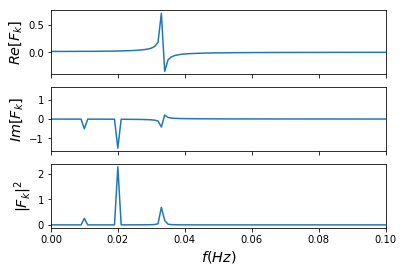

In [3]:
# plotting 3 panels
f, ax = plt.subplots(3,1,sharex=True)

# panel 1 shows Re(F) x freq 
ax[0].plot(freq, np.real(Fk)) 
ax[0].set_ylabel('$Re[F_k]$', size = 'x-large')
ax[0].set_xlim([0.0 ,0.1])


# panel 2 shows Im(F) x freq 
ax[1].plot(freq, np.imag(Fk)) 
ax[1].set_ylabel('$Im[F_k]$', size = 'x-large')
ax[1].set_xlim([0.0 ,0.1])

# panel 3 shows |F|^2 x freq (Power spectrum)
ax[2].plot(freq, np.absolute(Fk)**2) 
ax[2].set_ylabel('$|F_k|^2$',size = 'x-large')
ax[2].set_xlabel('$f (Hz)$', size = 'x-large')
ax[2].set_xlim([0.0 ,0.1])
plt.show()

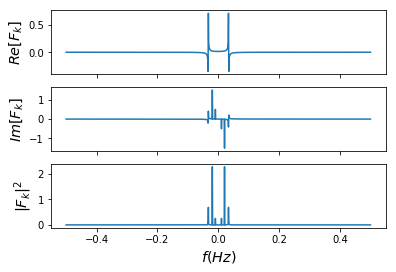

In [4]:
# plotting 3 panels (including negative frequencies)

f, ax = plt.subplots(3,1,sharex=True)

# panel 1 shows Re(F) x freq 
ax[0].plot(freq, np.real(Fk)) 
ax[0].set_ylabel('$Re[F_k]$', size = 'x-large')

# panel 2 shows Im(F) x freq 
ax[1].plot(freq, np.imag(Fk)) 
ax[1].set_ylabel('$Im[F_k]$', size = 'x-large')

# panel 3 shows |F|^2 x freq (Power spectrum)
ax[2].plot(freq, np.absolute(Fk)**2) 
ax[2].set_ylabel('$|F_k|^2$',size = 'x-large')
ax[2].set_xlabel('$f (Hz)$', size = 'x-large')
plt.show()